In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
df = pd.read_csv("/Users/anand/Desktop/Machine Learning/List_of_DataSet/Algerian_forest_fires_Cleaned_Dataset.csv")
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [61]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [62]:
# Independent and the dependednt variavbles

X = df.drop('FWI' , axis=1)
y = df['FWI']

In [63]:
# The dataset of the Independent features
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [64]:
# The dataset of the Dependent features
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [65]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
X_train.shape

(183, 11)

In [67]:
X_test.shape

(61, 11)

In [68]:
# Features selection based on the correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.609525,0.458575,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.694976,-0.344365,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.015384,0.022529,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.353219,-0.301347,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.744270,0.592841,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.652894,0.981876,0.580530,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.496563,0.941248,0.501279,-0.079217
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.496563,1.000000,0.624038,0.744568,0.267027
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.941248,0.624038,1.000000,0.583094,0.092548
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501279,0.744568,0.583094,1.000000,0.158763


<Axes: >

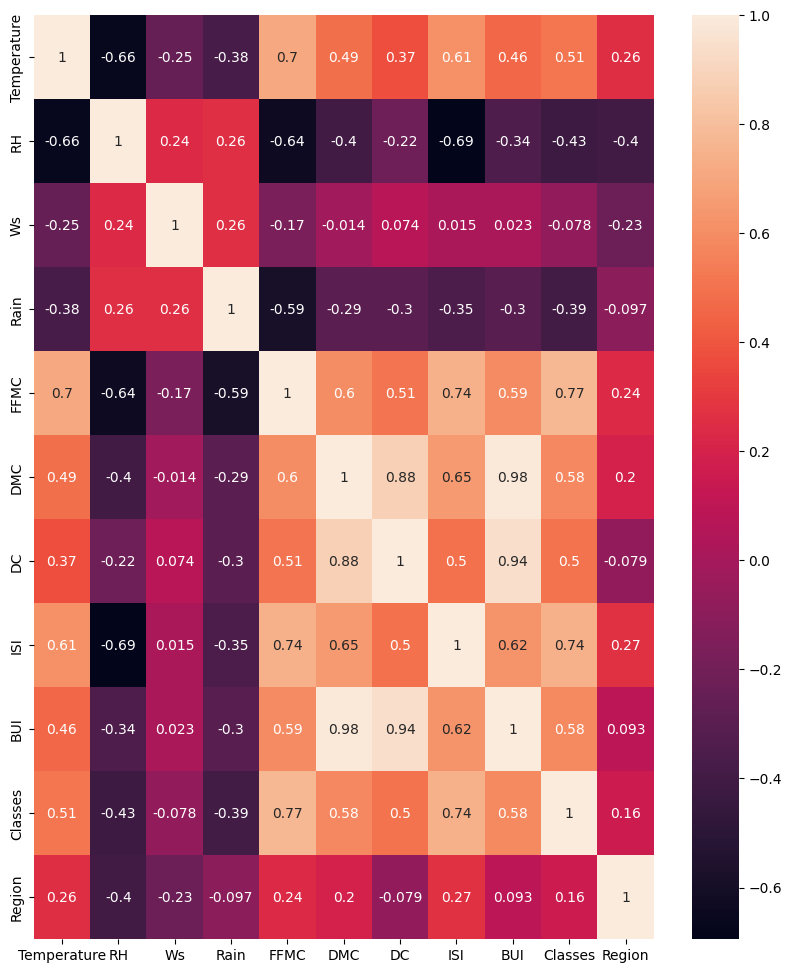

In [69]:
# check for multicolinearity
plt.figure(figsize=(10,12))
corr = X_train.corr()
sns.heatmap(corr , annot=True)

In [70]:
def correlation(dataset, threshold):
    """
    Finds and returns a list of features to drop due to high correlation.
    Drops one feature from each pair where correlation exceeds the threshold.
    """
    corr_matrix = dataset.corr(numeric_only=True)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    correlated_features = set()

    for column in upper.columns:
        for row in upper.index:
            value = upper.loc[row, column]
            if pd.notnull(value) and abs(value) > threshold:
                print(f"{row} and {column} have correlation of {value:.2f}")
                correlated_features.add(column)  # Drop the second feature in the pair

    return list(correlated_features)


In [71]:
# Threshold -- domain expertise
corr_features = correlation(X_train,0.85)

X_train.drop(columns=corr_features,axis = 1, inplace=True)
X_test.drop(columns=corr_features, axis =1 , inplace=True)


DMC and DC have correlation of 0.88
DMC and BUI have correlation of 0.98
DC and BUI have correlation of 0.94


In [72]:
X_train.shape , X_test.shape

((183, 9), (61, 9))

In [73]:
# Feature scalling / Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [77]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
181,36,56,16,0.0,88.9,23.8,8.2,1,1
225,31,72,14,0.0,84.2,8.3,3.8,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
104,25,86,21,4.6,40.9,1.3,0.1,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,33,57,16,0.0,87.5,15.7,6.7,1,1


In [78]:
X_train_Scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.773495  ,
        -1.1098231 , -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.83939993,
         0.9010445 ,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.21981465,
         0.9010445 ,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.08644476,
        -1.1098231 , -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.47830405,
         0.9010445 ,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.86978723,
        -1.1098231 , -1.00547949]])

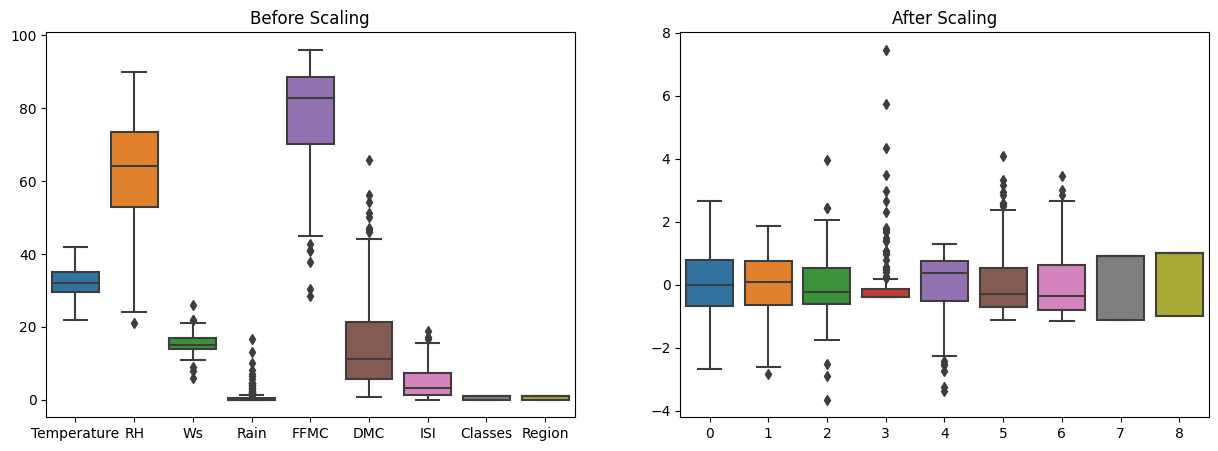

In [76]:
# understand the X-Train value befor and after scale using the boxplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_Scaled)
plt.title('After Scaling')
plt.show()
